In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

### Generating Dataset

In [3]:
X, y = make_regression(
                            n_samples = 1000,
                            n_features = 2,
                            n_targets = 1,
                            noise = 0.3,
                            random_state = 34
                        )

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

### Visualizing the dataset

[]

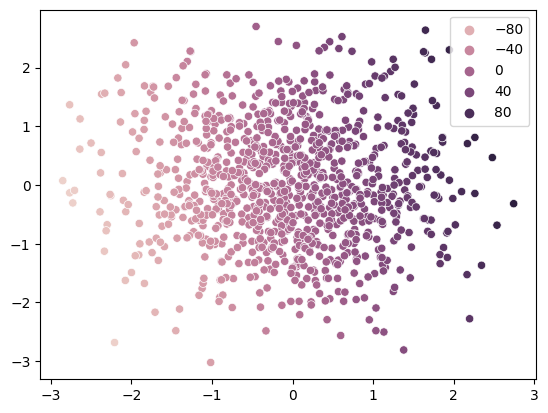

In [5]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.plot()

### Splitting the dataset in train and test datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

In [7]:
X_train.shape, y_train.shape

((700, 2), (700,))

In [8]:
X_test.shape, y_test.shape

((300, 2), (300,))

### Model Training

In [9]:
svr = SVR(kernel = 'linear')

In [10]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[39.75798028,  8.6562575 ]])

### Prediction

In [13]:
y_pred_test = svr.predict(X_test)

### Accuraccy

In [15]:
r2score = r2_score(y_test, y_pred_test)
print("Accuracy: ", r2score)

Accuracy:  0.9999463028282173


### Hyperparameter Tuning

In [16]:
parameters = {
    'C' : [0.01, 0.1, 1, 10, 100, 1000],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto', 1, 0.1, 0.001, 0.0001],
    'epsilon' : [0.1, 0.2, 0.3]
}

In [20]:
regressor = SVR()
grid_search_cv_reg = GridSearchCV(regressor, param_grid = parameters, refit = True, cv = 5, verbose = 3)

In [21]:
grid_search_cv_reg.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.200 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.171 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.195 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.191 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.197 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=poly;, score=0.187 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=poly;, score=0.198 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=poly;, score=0.204 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=poly;, score=0.193 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=poly;, score=0.232 total time=   0.0s
[CV 1/

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [22]:
grid_search_cv_reg.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'}

In [23]:
y_pred_test = grid_search_cv_reg.predict(X_test)

### Accuraccy

In [24]:
r2score = r2_score(y_test, y_pred_test)
print("Accuracy: ", r2score)

Accuracy:  0.9999467994694414
